# PROBLEM STATEMENT

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management where in a machine learning model can be of great help.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.shape

(299, 13)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.isnull().sum()/len(df)*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
col = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time','DEATH_EVENT']

## univariate analysis

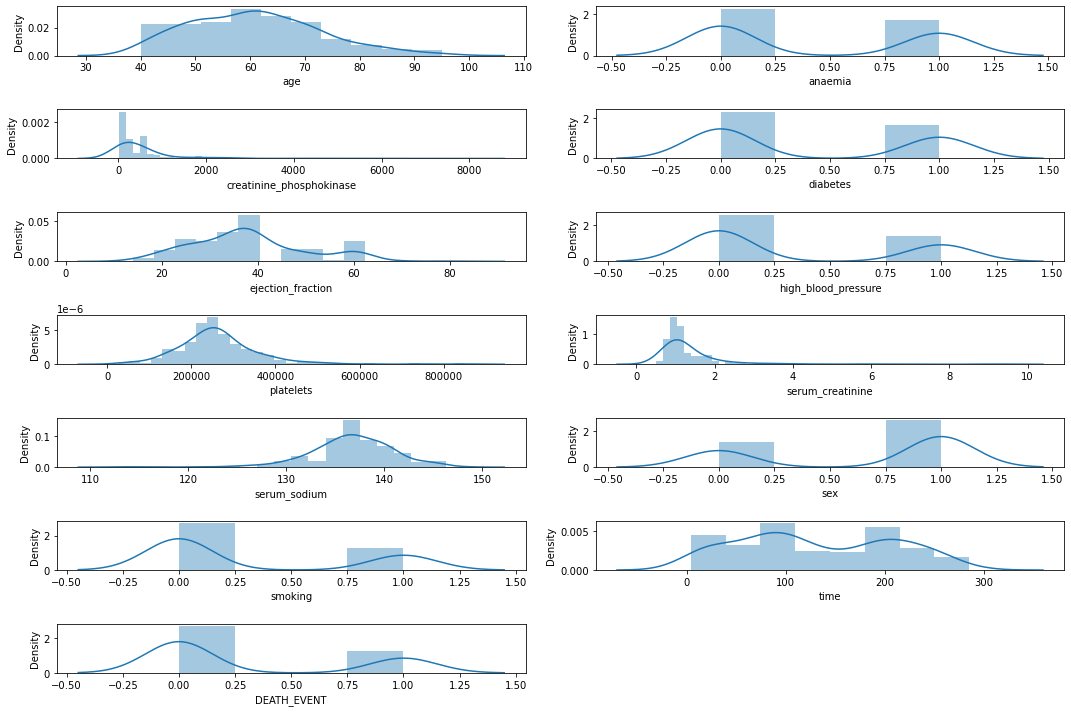

In [9]:
plt.figure(figsize=(15,10))
nrows = 7
ncols = 2
iterator = 1

for i in col:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(df.loc[:,i],kde = True)
    iterator = iterator+1
    
plt.tight_layout()
plt.show()

## Bivariate analysis

In [10]:
col 

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [11]:
cat_col = ['anaemia','diabetes','high_blood_pressure','sex','smoking']

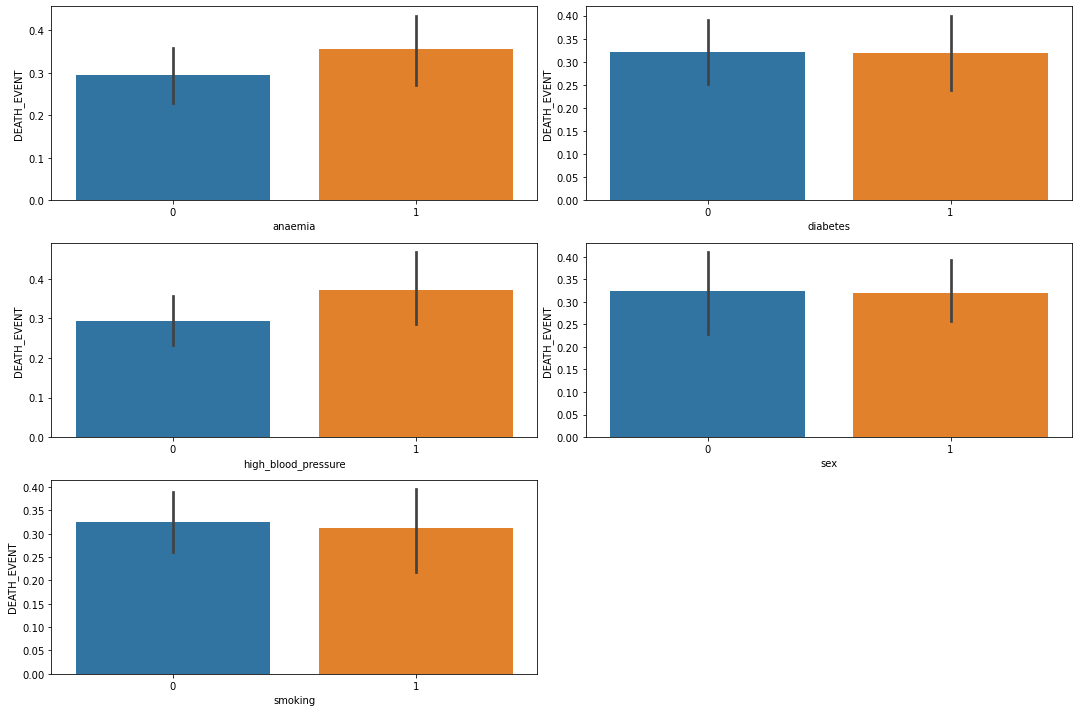

In [12]:
plt.figure(figsize=(15,10))
nrows = 3
ncols = 2
iterator = 1

for i in cat_col:
    plt.subplot(nrows,ncols,iterator)
    sns.barplot(x = df.loc[:,i],y = df['DEATH_EVENT'])
    iterator = iterator+1
    
plt.tight_layout()
plt.show()

In [13]:
num_col = ['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

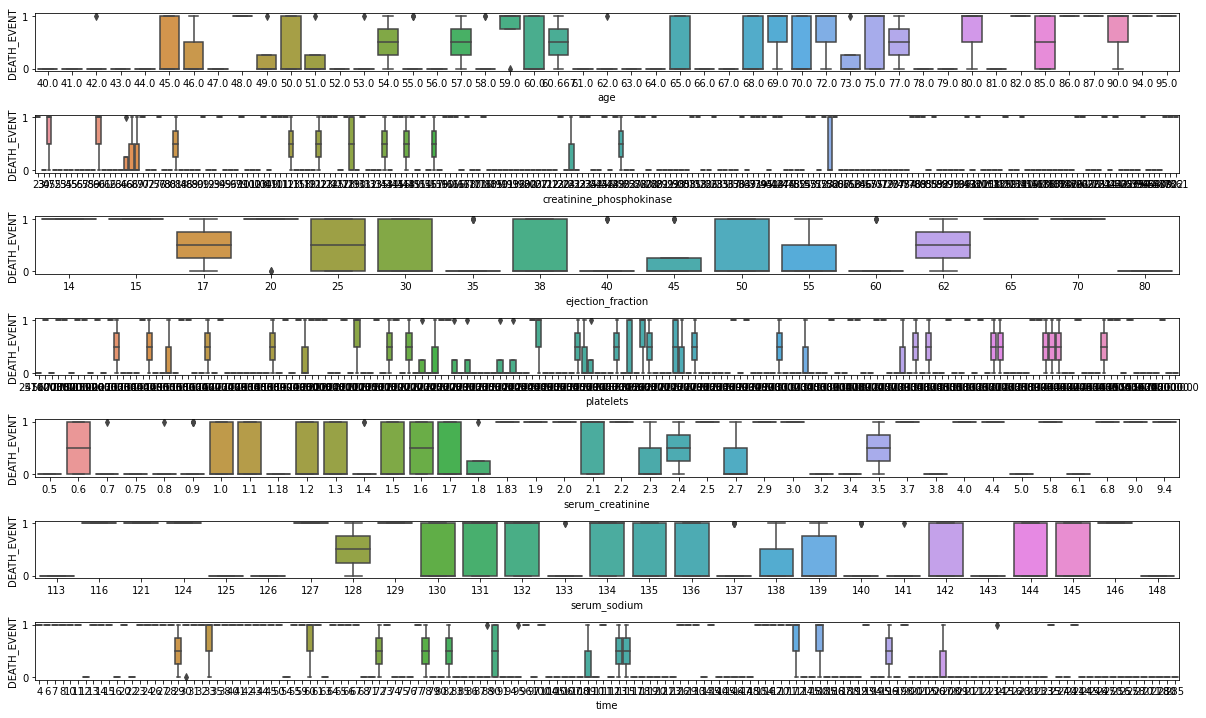

In [14]:
plt.figure(figsize=(17,10))
nrows = 7
ncols = 1
iterator = 1

for i in num_col:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x = df.loc[:,i],y = df['DEATH_EVENT'])
    iterator = iterator+1
    
plt.tight_layout()
plt.show()

<AxesSubplot:>

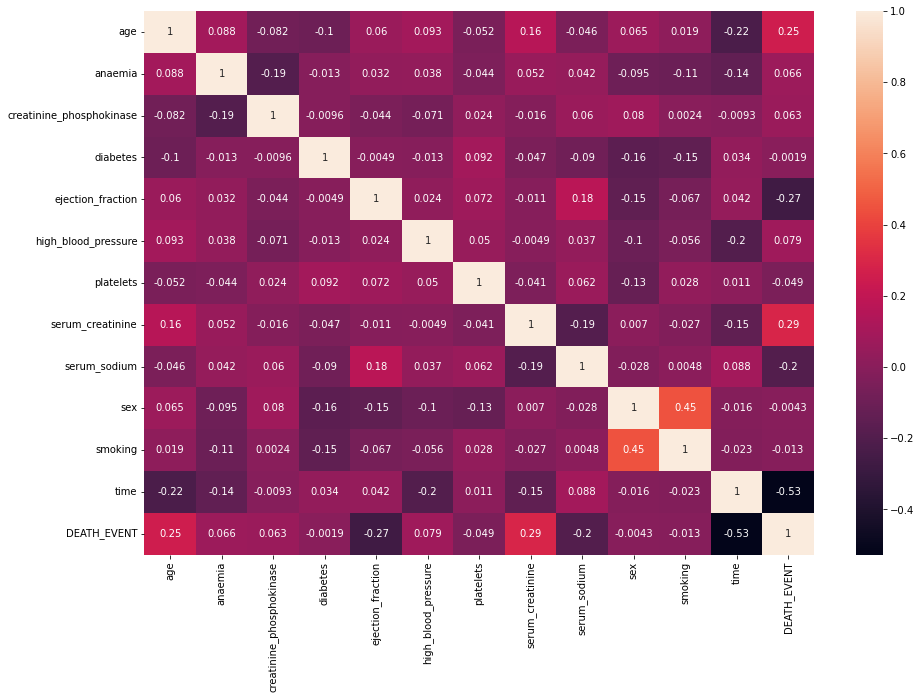

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True)

In [16]:
X = df.drop('DEATH_EVENT',axis = 1)
y = df['DEATH_EVENT']

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(X)
x = pd.DataFrame(df_scaled)
x.columns=X.columns
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state=5)

In [19]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(209, 12)
(90, 12)
(209,)
(90,)


In [20]:
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

## Decision tree 

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Train

In [22]:
dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(xtrain,ytrain)
ypred=dtree.predict(xtrain)
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        68

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



<AxesSubplot:xlabel='importance', ylabel='Features'>

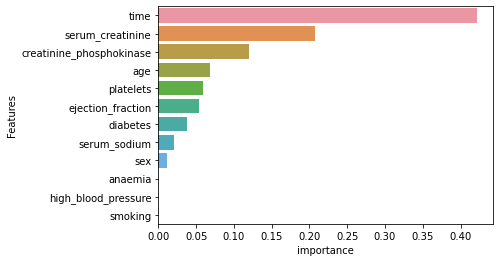

In [23]:
feature_imp = pd.DataFrame()
feature_imp['Features'] = xtrain.columns
feature_imp['importance'] = dtree.feature_importances_

feature_imp1 = feature_imp.sort_values('importance',ascending=False)
sns.barplot(x = 'importance',y = 'Features',data = feature_imp1)

### Test

In [36]:
dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(xtrain,ytrain)
ypred=dtree.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        62
           1       0.62      0.64      0.63        28

    accuracy                           0.77        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.77      0.77      0.77        90



In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[]
for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain.values,i))
    
pd.DataFrame({'Features':xtrain.columns,'VIF':vif}).sort_values(by='VIF',ascending=False)

,Features,VIF
9,sex,1.372847
10,smoking,1.293999
8,serum_sodium,1.156410
0,age,1.137143
11,time,1.128813
4,ejection_fraction,1.118693
5,high_blood_pressure,1.109348
1,anaemia,1.104522
3,diabetes,1.071853
7,serum_creatinine,1.064889


## RandomForest

### Train 

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(class_weight='balanced')
rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtrain)
print(classification_report(ytrain,ypred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        68

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



<AxesSubplot:xlabel='importance', ylabel='Features'>

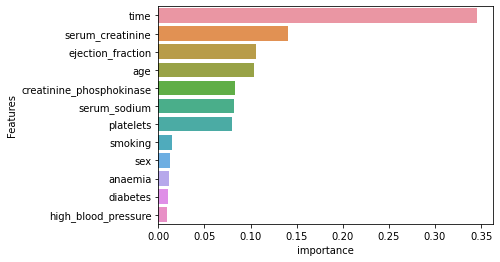

In [26]:
feature_imp = pd.DataFrame()
feature_imp['Features'] = xtrain.columns
feature_imp['importance'] = rf.feature_importances_

feature_imp1 = feature_imp.sort_values('importance',ascending=False)
sns.barplot(x = 'importance',y = 'Features',data = feature_imp1)

### Test 

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(class_weight='balanced')
rf.fit(xtrain,ytrain)
ypred_rf = rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        62
           1       0.78      0.64      0.71        28

    accuracy                           0.83        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.83      0.83      0.83        90



## GradientBoost

### Train 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred_gb = gb.predict(xtrain)
print(classification_report(ytrain,ypred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        68

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



<AxesSubplot:xlabel='importance', ylabel='Features'>

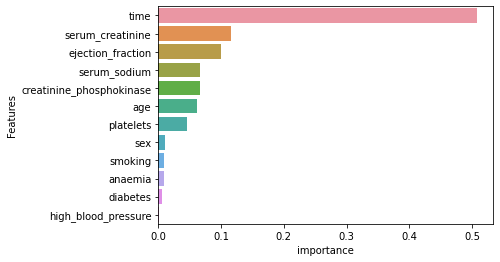

In [28]:
feature_imp = pd.DataFrame()
feature_imp['Features'] = xtrain.columns
feature_imp['importance'] = gb.feature_importances_

feature_imp1 = feature_imp.sort_values('importance',ascending=False)
sns.barplot(x = 'importance',y = 'Features',data = feature_imp1)

### Test

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(xtrain,ytrain)
ypred_gb = gb.predict(xtest)
print(classification_report(ytest,ypred_gb))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        62
           1       0.79      0.68      0.73        28

    accuracy                           0.84        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90



## XG Boost

### Train

In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred_xgb = xgb.predict(xtrain)
print(classification_report(ytrain,ypred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        68

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



<AxesSubplot:xlabel='importance', ylabel='Features'>

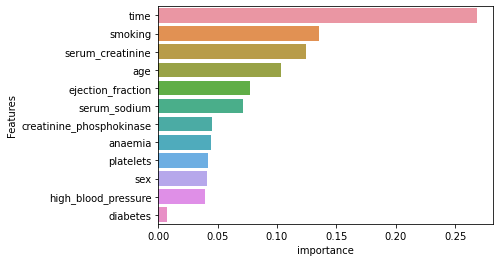

In [30]:
feature_imp = pd.DataFrame()
feature_imp['Features'] = xtrain.columns
feature_imp['importance'] = xgb.feature_importances_

feature_imp1 = feature_imp.sort_values('importance',ascending=False)
sns.barplot(x = 'importance',y = 'Features',data = feature_imp1)

### Test

In [39]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred_xgb = xgb.predict(xtest)
print(classification_report(ytest,ypred_xgb))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        62
           1       0.68      0.68      0.68        28

    accuracy                           0.80        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



## Hyperparametric Tuning 

In [33]:
from sklearn.model_selection import GridSearchCV

params = [{'n_estimators':[100, 200, 500, 1000],'max_depth':[2, 4, 6, 8]}]

xgb = XGBClassifier()
grid = GridSearchCV(estimator = xgb, param_grid = params, cv = 5)

grid.fit(xtrain,ytrain)
grid.best_params_

{'max_depth': 2, 'n_estimators': 200}

### Train

In [35]:
from xgboost import XGBClassifier
xgb1=XGBClassifier(max_depth=2, n_estimators=200)
xgb1.fit(xtrain,ytrain)
ypred_xgb1 = xgb1.predict(xtrain)
print(classification_report(ytrain,ypred_xgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        68

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



### Test 

In [40]:
from xgboost import XGBClassifier
xgb1=XGBClassifier(max_depth=2, n_estimators=200)
xgb1.fit(xtrain,ytrain)
ypred_xgb1 = xgb1.predict(xtest)
print(classification_report(ytest,ypred_xgb1))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        62
           1       0.66      0.68      0.67        28

    accuracy                           0.79        90
   macro avg       0.75      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



## KNeighborsClassifier

### Train

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(xtrain,ytrain)
ypred_knn = knn.predict(xtrain)
print(classification_report(ytrain,ypred_knn))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       141
           1       0.80      0.47      0.59        68

    accuracy                           0.79       209
   macro avg       0.79      0.71      0.73       209
weighted avg       0.79      0.79      0.77       209



### Test 

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(xtrain,ytrain)
ypred_knn = knn.predict(xtest)
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84        62
           1       0.78      0.25      0.38        28

    accuracy                           0.74        90
   macro avg       0.76      0.61      0.61        90
weighted avg       0.75      0.74      0.70        90



## Gaussian Naive Bayes

### Train 

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(xtrain,ytrain)

ypred_gnb = gnb.predict(xtrain)
print(classification_report(ytrain,ypred_gnb))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83       141
           1       0.71      0.43      0.53        68

    accuracy                           0.76       209
   macro avg       0.74      0.67      0.68       209
weighted avg       0.75      0.76      0.74       209



### Test

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(xtrain,ytrain)

ypred_gnb = gnb.predict(xtest)
print(classification_report(ytest,ypred_gnb))


              precision    recall  f1-score   support

           0       0.77      0.94      0.85        62
           1       0.73      0.39      0.51        28

    accuracy                           0.77        90
   macro avg       0.75      0.66      0.68        90
weighted avg       0.76      0.77      0.74        90

